# Business Understanding

eCommerce has taken over the retail space making it close to impossible for brick and mortar stores to compete with larger retailers such as Amazon, Target, or Walmart.  Over the years we have seen stores begin to close their doors due to the innability to keep up with online competitors.

Goodreads is an online social platform which gives readers the ability to share and rank their most recent books read.  Once a user marks a book read or rates the book, the platform will recommend a new book to the user. A recent study was done which showed 93% of customers will read online reviews prior to purchasing. 

Barnes and Noble is looking to understand what books should be showcased in their stores.  They are looking to get ahead of the game by utilizing a model which can predict the rating of a book on the most popular book reviewed site.

# Data Understanding

This dataset contains more than 1.3M book reviews about 25,475 books and 18,892 users.  It was found through the Kaggle Good Reads Book Competition.

The dataset of this competition is taken from UCSD Book Graph.

## Import Packages

Import necessary packages to load datasets and begin EDA.

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Load both the data

In [340]:
df = pd.read_csv("Data/goodreads_train.csv")

## Previewing Data

Load information on dataset.

### Data Information

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


### Data Head

View first five rows of train dataset.

In [342]:
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


View last five rows of dataset.

In [343]:
df.tail()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0
899999,b9450d1c1f97f891c392b1105959b56e,17005,d55f3a967230940e75a314700caec9a5,3,** spoiler alert ** \n 3.5 stars \n I liked it...,Sun Nov 11 00:05:43 -0800 2012,Sun Nov 11 21:59:08 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,0,0


## Data Preperation

### Null Values

Looking at the null values we will be able to make a better decision on what to do with those two columns once we explore the data a little deeper.

In [344]:
df.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

Fill null values in the column read_at and started_at with "N/A"

In [345]:
df.read_at = df.read_at.fillna(value = "0")

In [346]:
df.started_at = df.started_at.fillna(value = "N/A")

Review the null values again to make sure there are none.

In [347]:
df.isna().sum()

user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

## Exploring Columns

### user_id

User Id is the numerical number given to a user.  This is their unique identifier.  There are 12,188 User id's in this dataset.

In [348]:
user = len(pd.unique(df['user_id']))
  
print("No.of.unique values :", 
      user)

No.of.unique values : 12188


### book_id

Book Id is the numerical number given to a book.  This is their unique identifier.  There are 25,474 book id's in this dataset.

In [349]:
book = len(pd.unique(df['book_id']))
  
print("No.of.unique values :", 
      book)

No.of.unique values : 25474


### review_id

Review id is the numerical number given to an individual review.  There are 900,000 unique reviews within this dataset.  This means that that every row is an individual review.

In [350]:
review = len(pd.unique(df['review_id']))
  
print("No.of.unique values :", 
      review)

No.of.unique values : 900000


### rating

Rating is the number which is given during a review.  0 is the lowest score you can receive and 5 is the highest score you can receive.

In [351]:
df['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

### n_votes

Votes is the number of votes which a review contains.  Here we also will view some EDA on how number of votes averages by rating given.

In [352]:
df['n_votes'].value_counts(normalize=True)

0       0.581260
1       0.157020
2       0.069991
3       0.040274
4       0.026211
          ...   
894     0.000001
591     0.000001
291     0.000001
387     0.000001
1023    0.000001
Name: n_votes, Length: 540, dtype: float64

In [353]:
n_votes_data = df.groupby('rating').mean()['n_votes'].sort_values().reset_index()

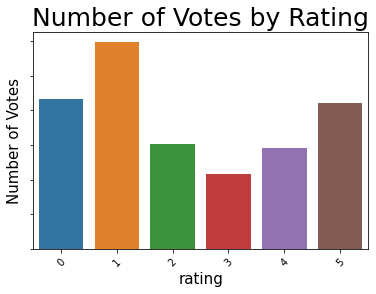

In [354]:
ax = sns.barplot(x = 'rating', y = 'n_votes', data=n_votes_data)
ax.set_xlabel('rating', size = 15)
ax.set_ylabel('Number of Votes', size = 15)
ax.set_title('Number of Votes by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### n_comments

Comments is the number of comments which a review contains.  Here we also will view some EDA on how number of comments averages by rating given.

In [355]:
df['n_comments'].value_counts(normalize=True)

0      0.837780
2      0.040009
1      0.039028
3      0.017184
4      0.014027
         ...   
221    0.000001
222    0.000001
223    0.000001
225    0.000001
170    0.000001
Name: n_comments, Length: 236, dtype: float64

In [356]:
n_comments_data = df.groupby('rating').mean()['n_comments'].sort_values().reset_index()

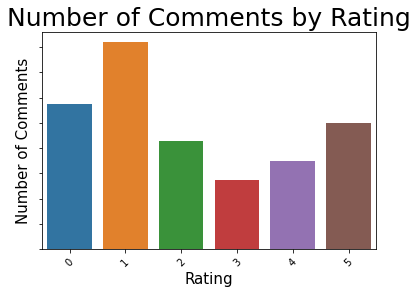

In [357]:
ax = sns.barplot(x = 'rating', y = 'n_comments', data=n_comments_data)
ax.set_xlabel('Rating', size = 15)
ax.set_ylabel('Number of Comments', size = 15)
ax.set_title('Number of Comments by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

## Word Cloud

Below we will utilize wordclouds for every rating besides 0.  This will give us an understanding if any words stand out in one rating that don't in another.

In an original wordcloud built it was noticed that Book was the largest word in each rating.  Considering that all these reviews have to do with books we added it to the stopwords list to be removed prior to building the wordcloud.

In [358]:
Five_rating = " ".join(review for review in df[df["rating"]==5]['review_text'])
Four_Rating = " ".join(review for review in df[df["rating"]==4]['review_text'])
Three_Rating = " ".join(review for review in df[df["rating"]==3]['review_text'])
Two_Rating = " ".join(review for review in df[df["rating"]==2]['review_text'])
One_Rating = " ".join(review for review in df[df["rating"]==1]['review_text'])

### Word Cloud Five Rating

WordCloud for rating five.

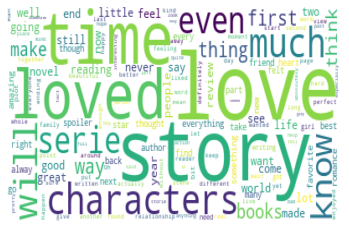

In [359]:
from wordcloud import WordCloud, STOPWORDS

wc_stopwords= set(STOPWORDS)
wc_new_words = ["book", "read", "character", "really", "one"]
wc_new_stopwords=wc_stopwords.union(wc_new_words)

wordcloud_five = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Five_rating)

# Display the generated image:
plt.imshow(wordcloud_five, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Four Rating

WordCloud for rating four.

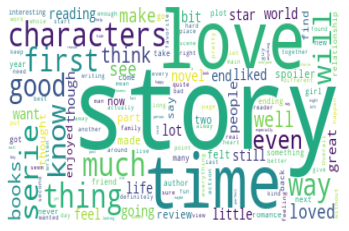

In [360]:
wordcloud_four = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Four_Rating)

# Display the generated image:
plt.imshow(wordcloud_four, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Three Rating

WordCloud for rating three.

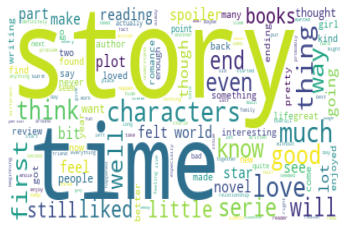

In [361]:
wordcloud_three = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Three_Rating)

# Display the generated image:
plt.imshow(wordcloud_three, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Two Rating

WordCloud for rating two.

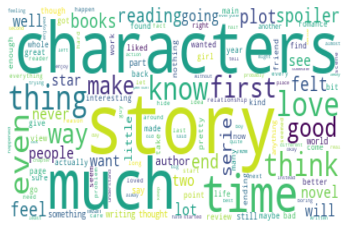

In [362]:
wordcloud_two = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Two_Rating)

# Display the generated image:
plt.imshow(wordcloud_two, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud One Rating

WordCloud for rating one.

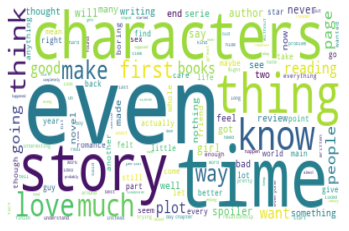

In [363]:
wordcloud_one = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(One_Rating)

# Display the generated image:
plt.imshow(wordcloud_one, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

## Remove 0 Rating

Based on a quick glance throughout the good reads website, it was noticed that you cannot give a book a zero rating.  This tells us that the 0 rating cannot be identified as a numerical rating.  It will be removed from the dataset.

In [364]:
df.drop(df[(df['rating'] == 0)].index, inplace=True)

# Sample Data

The dataset is extremely large and would not run in a timely manner.  It was chosen to sample 100000 rows of data to build a model.  The sample data was weighted by rating based on value counts prior to sampling.  This is used in order to give an even distirbution of ratings to increase model performance.

Assign weights to each rating based on value counts.

In [365]:
weights = {5: 1,
          4: 1,
          3: 2,
          2: 5,
          1: 15,}

In [366]:
df['weights'] = df['rating'].apply(lambda x: weights[x])
df

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,weights
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,0,N/A,1,0,2
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,2
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,1
5,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0,2
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1,2
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0,1
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0,1


Sample 100000 rows with the parameter 'weights'

In [367]:
sample_df = df.sample(n = 100000, weights = 'weights', random_state=42)

In [368]:
sample_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,weights
337620,60328a58b488cec5b0ac7c89979c07d6,9378297,5b86366b36bbeee1ad2dc65536d7ce37,3,3.5 stars \n This was one of those funny (not ...,Sat Oct 29 19:07:35 -0700 2011,Wed Nov 16 22:18:09 -0800 2011,0,N/A,1,0,2
854335,28723c0f728d943393b50352771f6b87,25528801,6229bd4b92be26bd23e23220da21e751,4,This is certainly a 4+. I wish Goodreads would...,Sun Apr 17 04:16:15 -0700 2016,Wed Jun 29 01:25:31 -0700 2016,Wed Jun 29 01:25:31 -0700 2016,Mon May 09 00:00:00 -0700 2016,0,0,1
655653,53a47ada249517b90794804df14d429e,37743,5b25d1bb81eefc23bcb14f9569d7095c,2,"I picked this up because I needed a ""banned"" b...",Tue May 18 16:10:36 -0700 2010,Tue May 18 16:15:27 -0700 2010,Tue May 18 00:00:00 -0700 2010,Tue May 18 00:00:00 -0700 2010,0,0,5
534798,ae91226657fa72146b587bd37d8301fd,35729,510305afcd4fd795692aef8585520b50,3,The dialog when this book started was so bad I...,Sun Nov 15 15:24:50 -0800 2009,Sat Oct 06 12:16:51 -0700 2012,Sat Nov 14 00:00:00 -0800 2009,N/A,21,6,2
139556,7fc377942ab7005f245d0622efefa9cb,13206900,cb5a246ecf9d3fdde4c542e6cd084421,5,WHHHHHHYYYYYYYY???????!!!!!!!!!!!!!!!! \n Its ...,Mon Apr 04 09:38:54 -0700 2016,Mon Apr 04 09:40:39 -0700 2016,Fri Jan 01 00:00:00 -0800 2016,N/A,0,0,1


In [369]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 337620 to 846593
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  object
 1   book_id       100000 non-null  int64 
 2   review_id     100000 non-null  object
 3   rating        100000 non-null  int64 
 4   review_text   100000 non-null  object
 5   date_added    100000 non-null  object
 6   date_updated  100000 non-null  object
 7   read_at       100000 non-null  object
 8   started_at    100000 non-null  object
 9   n_votes       100000 non-null  int64 
 10  n_comments    100000 non-null  int64 
 11  weights       100000 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 9.9+ MB


In [370]:
sample_df['rating'].value_counts()

3    23560
2    20834
4    20215
1    18196
5    17195
Name: rating, dtype: int64

## Drop Columns

With the data now being sampled we drop columns which will not be necessary in modeling.

In [371]:
sample_df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated',
                'started_at', 'read_at', 'n_votes', 'n_comments', 'weights'], inplace = True)

In [372]:
sample_df.head()

,rating,review_text
337620,3,3.5 stars \n This was one of those funny (not ...
854335,4,This is certainly a 4+. I wish Goodreads would...
655653,2,"I picked this up because I needed a ""banned"" b..."
534798,3,The dialog when this book started was so bad I...
139556,5,WHHHHHHYYYYYYYY???????!!!!!!!!!!!!!!!! \n Its ...


# Version One

## Train Test Split Version One

Utilize a train test split on the data.

In [373]:
X = sample_df.drop("rating", axis = 1)
y = sample_df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

## Standardizing Version One

Standardize the review text data to increase model performance.

In [374]:
import nltk
nltk.download('wordnet')


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


X_train['review_text']=X_train['review_text'].map(lambda s:preprocess(s))
X_test['review_text']=X_test['review_text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryvangorp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-374-1328b8670c3c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['review_text']=X_train['review_text'].map(lambda s:preprocess(s))
<ipython-input-374-1328b8670c3c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['review_text']=X_test['review_text'].map(lambda s:preprocess(s))


View an example row to make sure it worked properly.

In [375]:
X_train.iloc[100]["review_text"]

'wow ending speechless see coming discovered third book exist yet ughhh'

Create a sample dataset to see how it looks on five rows.

In [376]:
train_sample = X_train.sample(5, random_state=22)
train_sample["label"] = [y_train[val] for val in train_sample.index]
train_sample.style.set_properties(**{'text-align': 'left'})

,review_text,label
57693,loving series emotion laughter panic joy,5
756547,ugh bad teen romance novel get,1
683845,yes guy usually player yes woman usually naive version bound get hurt yes bound happy ending yes fun whole thing course refreshing way actually chases makes work like fan fan banter fun guys one like fact books seem focus relationship men rather bitching emotions female friend circle often written quite poorly focused upon sort novel,4
225784,book okay kate slight annoyance complete contradiction every chapter beginning book lead believe tough take shit woman caves becomes simpering idiot stays way big softy lookin love callum good grudge took lot away romance kate perfect example protesting much turning adage cant let love right blah blah blah came around end though redeemable almost little late opinion okay read,3
333883,engaging enough done interested else happens amazingly beautiful smart charming eve look like male love interest described person color though would enjoyed eve fallen love arden girl,2


In [377]:
review_sample = train_sample.iloc[0]["review_text"]
review_sample

'loving series emotion laughter panic joy'

## Tokenizing Version One

After standardizing our data we want to tokenize the 'review_text' column in both our X_train and X_test.

In [378]:
review_sample2 = train_sample.iloc[1]["review_text"]
review_sample2

'ugh bad teen romance novel get'

In [379]:
review_sample2.split()[:10]

['ugh', 'bad', 'teen', 'romance', 'novel', 'get']

In [380]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(review_sample2)[:10]

['ugh', 'bad', 'teen', 'romance', 'novel', 'get']

Tokenize on full dataset.

In [381]:
train_sample["text_tokenized"] = train_sample["review_text"].apply(tokenizer.tokenize)

train_sample.style.set_properties(**{'text-align': 'left'})

,review_text,label,text_tokenized
57693,loving series emotion laughter panic joy,5,"['loving', 'series', 'emotion', 'laughter', 'panic', 'joy']"
756547,ugh bad teen romance novel get,1,"['ugh', 'bad', 'teen', 'romance', 'novel', 'get']"
683845,yes guy usually player yes woman usually naive version bound get hurt yes bound happy ending yes fun whole thing course refreshing way actually chases makes work like fan fan banter fun guys one like fact books seem focus relationship men rather bitching emotions female friend circle often written quite poorly focused upon sort novel,4,"['yes', 'guy', 'usually', 'player', 'yes', 'woman', 'usually', 'naive', 'version', 'bound', 'get', 'hurt', 'yes', 'bound', 'happy', 'ending', 'yes', 'fun', 'whole', 'thing', 'course', 'refreshing', 'way', 'actually', 'chases', 'makes', 'work', 'like', 'fan', 'fan', 'banter', 'fun', 'guys', 'one', 'like', 'fact', 'books', 'seem', 'focus', 'relationship', 'men', 'rather', 'bitching', 'emotions', 'female', 'friend', 'circle', 'often', 'written', 'quite', 'poorly', 'focused', 'upon', 'sort', 'novel']"
225784,book okay kate slight annoyance complete contradiction every chapter beginning book lead believe tough take shit woman caves becomes simpering idiot stays way big softy lookin love callum good grudge took lot away romance kate perfect example protesting much turning adage cant let love right blah blah blah came around end though redeemable almost little late opinion okay read,3,"['book', 'okay', 'kate', 'slight', 'annoyance', 'complete', 'contradiction', 'every', 'chapter', 'beginning', 'book', 'lead', 'believe', 'tough', 'take', 'shit', 'woman', 'caves', 'becomes', 'simpering', 'idiot', 'stays', 'way', 'big', 'softy', 'lookin', 'love', 'callum', 'good', 'grudge', 'took', 'lot', 'away', 'romance', 'kate', 'perfect', 'example', 'protesting', 'much', 'turning', 'adage', 'cant', 'let', 'love', 'right', 'blah', 'blah', 'blah', 'came', 'around', 'end', 'though', 'redeemable', 'almost', 'little', 'late', 'opinion', 'okay', 'read']"
333883,engaging enough done interested else happens amazingly beautiful smart charming eve look like male love interest described person color though would enjoyed eve fallen love arden girl,2,"['engaging', 'enough', 'done', 'interested', 'else', 'happens', 'amazingly', 'beautiful', 'smart', 'charming', 'eve', 'look', 'like', 'male', 'love', 'interest', 'described', 'person', 'color', 'though', 'would', 'enjoyed', 'eve', 'fallen', 'love', 'arden', 'girl']"


Create new column with tokenized data

In [382]:
X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)

<ipython-input-382-d41133729210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
<ipython-input-382-d41133729210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)


In [383]:
X_train.iloc[100]["text_tokenized"][:20]

['wow',
 'ending',
 'speechless',
 'see',
 'coming',
 'discovered',
 'third',
 'book',
 'exist',
 'yet',
 'ughhh']

## Exploratory Data Analysis: Frequency Distributions

Now that the data has been standardized and tokenized we can look at frequency distributions within our dataset. First we will look at the frequency on one tweet and then we will utilize the function on the entire dataset.

In [384]:
from nltk import FreqDist

example_freq_dist = FreqDist(X_train.iloc[100]["text_tokenized"][:20])
example_freq_dist

FreqDist({'wow': 1, 'ending': 1, 'speechless': 1, 'see': 1, 'coming': 1, 'discovered': 1, 'third': 1, 'book': 1, 'exist': 1, 'yet': 1, ...})

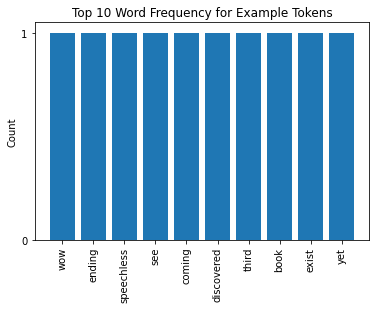

In [385]:
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

### Visualizing the Frequency Distribution for the Full Dataset

Now that we know our function works we will look at the frequency of the entire dataset.

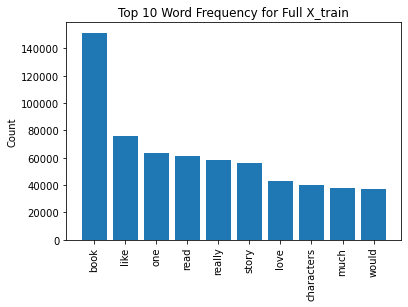

In [386]:
train_freq_dist = FreqDist(X_train["text_tokenized"].explode())

visualize_top_10(train_freq_dist, "Top 10 Word Frequency for Full X_train")

# Modeling Version One

## Baseline Model with TfidVectorizer and MultinomialNB Version One

After our data has been cleaned we are ready to start modeling. We can now utilize TF-IDF Vectorizer followed by building our first baseline model with MultinomialNB

In [387]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X_train_vectorized = tfidf.fit_transform(X_train["review_text"])
X_test_vectorized = tfidf.transform(X_test["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,ability,able,absolutely,across,act,action,actions,actual,actually,adam,...,written,wrong,wrote,yeah,year,years,yes,yet,young,younger
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.074733,0.0,0.0,0.072261,0.0,0.000000,0.000000,0.0,...,0.000000,0.071082,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.184146,0.000000,0.0,...,0.137665,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.043998,0.000000,0.0,0.000000,0.0
74996,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.131491,0.000000,0.0,0.000000,0.0
74997,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.043753,0.0,...,0.094063,0.053730,0.0,0.0,0.0,0.000000,0.107709,0.0,0.000000,0.0
74998,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [388]:
assert X_train_vectorized.shape[0] == X_train.shape[0]

assert X_train_vectorized.shape[1] == 1000

Build baseline model with MultinomialNB

In [389]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

baseline_model = MultinomialNB()

baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.46246667, 0.4592    , 0.45846667, 0.45873333, 0.457     ])

In [390]:
y_train.value_counts(normalize=True)

3    0.235600
2    0.208347
4    0.202147
1    0.181960
5    0.171947
Name: rating, dtype: float64

In [391]:
from sklearn.metrics import classification_report

baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

In [392]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.50      0.55      4549
           2       0.44      0.35      0.39      5208
           3       0.38      0.64      0.47      5890
           4       0.40      0.31      0.35      5054
           5       0.61      0.45      0.52      4299

    accuracy                           0.45     25000
   macro avg       0.49      0.45      0.46     25000
weighted avg       0.48      0.45      0.45     25000



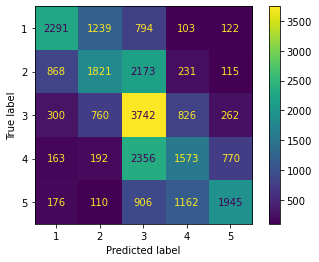

In [393]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model, X_test_vectorized, y_test)

#### GridSearch on Baseline Model Version One

Utilize a gridsearch on our baseline model to see if we can increase performance.

In [394]:
NB_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
           'class_prior': [None]
}

In [395]:
NB_grid_search = GridSearchCV(estimator=baseline_model, param_grid=NB_grid, verbose=2)

In [396]:
NB_grid_search.fit(X_train_vectorized, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.1s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'class_prior': [None], 'fit_prior': [True, False]},
             verbose=2)

In [397]:
NB_grid_search.best_params_

{'alpha': 10.0, 'class_prior': None, 'fit_prior': False}

In [398]:
baseline_model_2 = MultinomialNB(alpha = 10.0,
                                    fit_prior=False,
                                class_prior=None)
baseline_model_2.fit(X_train_vectorized, y_train)
y_pred_2 = baseline_model_2.predict(X_test_vectorized)

In [399]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           1       0.54      0.63      0.58      4549
           2       0.44      0.38      0.41      5208
           3       0.44      0.41      0.42      5890
           4       0.42      0.36      0.38      5054
           5       0.51      0.63      0.57      4299

    accuracy                           0.47     25000
   macro avg       0.47      0.48      0.47     25000
weighted avg       0.47      0.47      0.47     25000



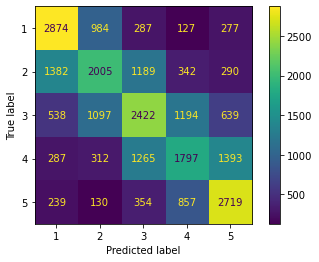

In [400]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_2, X_test_vectorized, y_test)

Performance was increased after using the gridsearch.

### Using Custom Tokens Version One

Feature engineer custom tokens to see if it enhances our model performance.

In [401]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [402]:
print("Original sample:", X_train.iloc[100]["text_tokenized"][20:30])
print("Stemmed sample: ", stem_and_tokenize(X_train.iloc[100]["review_text"])[20:30])

Original sample: []
Stemmed sample:  []


In [403]:
tfidf = TfidfVectorizer(
    max_features=1000,
    tokenizer=stem_and_tokenize
)


X_train_vectorized_token = tfidf.fit_transform(X_train["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_token, columns=tfidf.get_feature_names())

,abil,abl,absolut,abus,accept,across,act,action,actual,ad,...,written,wrong,wrote,yeah,year,yes,yet,young,younger,zombi
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.068736,0.0,0.0,0.0,0.000000,0.063521,0.000000,0.000000,...,0.000000,0.067064,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.120293,0.000000,...,0.136517,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.000000,0.0,0.0,0.0,0.047128,0.000000,0.000000,0.052934,...,0.000000,0.000000,0.0,0.0,0.033410,0.000000,0.0,0.000000,0.0,0.0
74996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.101034,0.000000,0.0,0.000000,0.0,0.0
74997,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.039263,0.000000,...,0.089117,0.050568,0.0,0.0,0.000000,0.102047,0.0,0.000000,0.0,0.0
74998,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [404]:
stemmed_cv = cross_val_score(baseline_model, X_train_vectorized_token, y_train)
stemmed_cv

array([0.45586667, 0.45553333, 0.45526667, 0.45593333, 0.44926667])

In [405]:
baseline_model.fit(X_train_vectorized_token, y_train)
y_pred_token = baseline_model.predict(X_test_vectorized)

In [406]:
print(classification_report(y_test, y_pred_token))

              precision    recall  f1-score   support

           1       0.21      0.13      0.16      4549
           2       0.22      0.16      0.19      5208
           3       0.24      0.43      0.31      5890
           4       0.22      0.26      0.24      5054
           5       0.22      0.07      0.11      4299

    accuracy                           0.23     25000
   macro avg       0.22      0.21      0.20     25000
weighted avg       0.22      0.23      0.21     25000



### Gridsearch After Creating Custom Tokens Version One

GridSearch with custom tokens.

In [407]:
NB_grid_search.fit(X_train_vectorized_token, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'class_prior': [None], 'fit_prior': [True, False]},
             verbose=2)

In [408]:
NB_grid_search.best_params_

{'alpha': 10.0, 'class_prior': None, 'fit_prior': False}

In [409]:
baseline_model_token = MultinomialNB(alpha = 10.0,
                                    fit_prior=False,
                                class_prior=None)
baseline_model_token.fit(X_train_vectorized_token, y_train)
y_pred_token2 = baseline_model_token.predict(X_test_vectorized)

In [410]:
print(classification_report(y_test, y_pred_token2))

              precision    recall  f1-score   support

           1       0.21      0.29      0.24      4549
           2       0.21      0.16      0.18      5208
           3       0.25      0.10      0.14      5890
           4       0.21      0.30      0.25      5054
           5       0.20      0.24      0.21      4299

    accuracy                           0.21     25000
   macro avg       0.21      0.22      0.20     25000
weighted avg       0.22      0.21      0.20     25000



## Second Model with Random Forest Version One

Create second model with Random Forest.  Utilizie gridsearch to find best parameters.

In [411]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline_model = RandomForestClassifier()

In [412]:
rf_baseline_model.fit(X_train_vectorized, y_train)
y_pred_rf = rf_baseline_model.predict(X_test_vectorized)

In [413]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.54      0.55      0.54      4549
           2       0.39      0.35      0.37      5208
           3       0.39      0.52      0.44      5890
           4       0.38      0.27      0.32      5054
           5       0.53      0.53      0.53      4299

    accuracy                           0.44     25000
   macro avg       0.45      0.44      0.44     25000
weighted avg       0.44      0.44      0.44     25000



### Gridsearch on Random Forest Version One

In [414]:
rf_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7],
    'criterion' :['gini', 'entropy']
}

In [415]:
rf_grid_search = GridSearchCV(estimator=rf_baseline_model,
                              param_grid=rf_grid, cv=5, n_jobs=1)

In [416]:
rf_grid_search.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [417]:
rf_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

In [418]:
rf_model_2 = RandomForestClassifier(criterion='gini',
                                    max_depth=7,
                                    max_features='auto',)
rf_model_2.fit(X_train_vectorized, y_train)
y_pred_rf2 = rf_model_2.predict(X_test_vectorized)

In [419]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           1       0.67      0.31      0.42      4549
           2       0.43      0.15      0.22      5208
           3       0.29      0.87      0.43      5890
           4       0.39      0.08      0.13      5054
           5       0.60      0.31      0.41      4299

    accuracy                           0.36     25000
   macro avg       0.47      0.34      0.33     25000
weighted avg       0.46      0.36      0.32     25000



## Third Model with XG Boost Version One

Third Model with XG Boost

In [420]:
from xgboost import XGBClassifier

xgb_baseline_model = XGBClassifier()

In [421]:
xgb_baseline_model.fit(X_train_vectorized, y_train)
y_pred_XG = xgb_baseline_model.predict(X_test_vectorized)

In [422]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

           1       0.56      0.57      0.56      4549
           2       0.42      0.37      0.39      5208
           3       0.41      0.47      0.44      5890
           4       0.37      0.36      0.37      5054
           5       0.55      0.53      0.54      4299

    accuracy                           0.45     25000
   macro avg       0.46      0.46      0.46     25000
weighted avg       0.45      0.45      0.45     25000



### Gridsearch on XG Boost

In [423]:
xgb_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [2, 4, 6, 8],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
}

In [424]:
xgb_grid_search = GridSearchCV(estimator=xgb_baseline_model,
                               param_grid=xgb_grid, cv=5, n_jobs=1)

xgb_grid_search.fit(X_train_vectorized, y_train)

# Best Fit Model Version One

The best fit model for version one is utilizing Multinomial NB with grisearch best parameters

In [425]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           1       0.54      0.63      0.58      4549
           2       0.44      0.38      0.41      5208
           3       0.44      0.41      0.42      5890
           4       0.42      0.36      0.38      5054
           5       0.51      0.63      0.57      4299

    accuracy                           0.47     25000
   macro avg       0.47      0.48      0.47     25000
weighted avg       0.47      0.47      0.47     25000



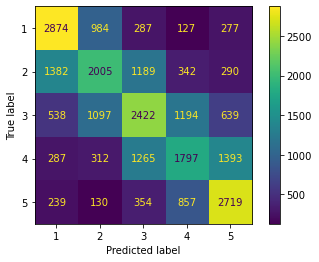

In [426]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_2, X_test_vectorized, y_test)

# Version 2

# Change Rating to Binary

Change rating for 4 & 5 to be listed as 1. 1, 2, & 3 to be listed as 0

In [427]:
sample_df2 = sample_df

In [428]:
sample_df2.head()

,rating,review_text
337620,3,3.5 stars \n This was one of those funny (not ...
854335,4,This is certainly a 4+. I wish Goodreads would...
655653,2,"I picked this up because I needed a ""banned"" b..."
534798,3,The dialog when this book started was so bad I...
139556,5,WHHHHHHYYYYYYYY???????!!!!!!!!!!!!!!!! \n Its ...


In [429]:
sample_df2['Updated_Rating']=sample_df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [430]:
sample_df.drop(columns=['rating'], inplace = True)

In [431]:
sample_df2.head()

,review_text,Updated_Rating
337620,3.5 stars \n This was one of those funny (not ...,0
854335,This is certainly a 4+. I wish Goodreads would...,1
655653,"I picked this up because I needed a ""banned"" b...",0
534798,The dialog when this book started was so bad I...,0
139556,WHHHHHHYYYYYYYY???????!!!!!!!!!!!!!!!! \n Its ...,1


## Train Test Split Version 2

In [432]:
X = sample_df2.drop("Updated_Rating", axis = 1)
y = sample_df2["Updated_Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

## Standardizing Version 2

In [433]:
import nltk
nltk.download('wordnet')


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


X_train['review_text']=X_train['review_text'].map(lambda s:preprocess(s))
X_test['review_text']=X_test['review_text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryvangorp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-433-1328b8670c3c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['review_text']=X_train['review_text'].map(lambda s:preprocess(s))
<ipython-input-433-1328b8670c3c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['review_text']=X_test['review_text'].map(lambda s:preprocess(s))


In [434]:
X_train.iloc[100]["review_text"]

'stars really enjoyed book although called twist even happened issue felt like amazing everyone said thi issue hyping try rereading one later probably earn last half star'

In [435]:
train_sample2 = X_train.sample(5, random_state=22)
train_sample2["label"] = [y_train[val] for val in train_sample.index]
train_sample2.style.set_properties(**{'text-align': 'left'})

,review_text,label
796235,quentin coldwater stumbled pot gold end rainbow constantly complain heavy coins fit vending machines put money nice cashier check could fit neatly wallet deposited bank first book quentin brilliant disillusioned teenager found life boring slog desperately wished things like favorite fantasy series set magical land called fillory think narnia quentin seemingly hit fantasy geek jackpot learned magic real admitted exclusive school called brakebills trained magicians yet constantly found disappointed never achieved idea true happiness even graduating classmate discovered fillory real path quentin seized notion going fillory way ever finally complete unfortunately quentin learned hard way big difference reading adventures actually finding magical battle various beasties trying kill magician king picks several years quentin one kings fillory lives life ease luxury friends course quentin never satisfied bird hand even relatively content volunteers diplomatic mission island seek two birds knows bush desire real adventure leads returning earth finding wish high stakes quest come true much bargained consequences enormous loved magicians unique twist like magic real world seemed like love hate book friends goodreads totally understood readers could stand quentin guy catches biggest break nerd history yet never satisfied grateful opportunity honesty starting hate pretty good first half book seemed like quentin forgotten everything suffered learned first book obsessed nerd convinced happy could live like fantasy novel however changes halfway several big plot developments spoil end one completely dropped earlier reservations also helped grossman obviously writing quentin obsessed pain ass early several characters call particularly nice bit quentin traveled europe earth moment clarity realizes wrote real world seen almost none one things also loved one backstory julia former high school classmate quentin failed brakebills entrance exam went find another way learn magic musicians like quentin went study juilliard julia learned garage bands punk clubs mention stuff occurs towards end made book cool left stunned conclusion like magicians probably change mind however like first one probably enjoy book especially moving incredibly dark third act originally read aug read aug,1
404194,interpretation cinderella heroine interested prince instead must choose huntress fairy godmother time writing book beautiful enough substance beneath particularly care ash choice plot tedious descriptions ash endless days servant quiet understated longing state something dammit state loudly fiercely able read bed kept nodding,0
357137,yes page turner also disturbingly violent long cup tea,1
186742,listened audio download narrated richard poe,0
738992,unrealistic much worked like characters hell even love hate characters creative field lack convincing plot ploys characters made frustrating laughable awesome bottom line felt much like every dark taboo thrown together around core story could good without bells whistles,0


In [436]:
review_sample3 = train_sample2.iloc[0]["review_text"]
review_sample3

'quentin coldwater stumbled pot gold end rainbow constantly complain heavy coins fit vending machines put money nice cashier check could fit neatly wallet deposited bank first book quentin brilliant disillusioned teenager found life boring slog desperately wished things like favorite fantasy series set magical land called fillory think narnia quentin seemingly hit fantasy geek jackpot learned magic real admitted exclusive school called brakebills trained magicians yet constantly found disappointed never achieved idea true happiness even graduating classmate discovered fillory real path quentin seized notion going fillory way ever finally complete unfortunately quentin learned hard way big difference reading adventures actually finding magical battle various beasties trying kill magician king picks several years quentin one kings fillory lives life ease luxury friends course quentin never satisfied bird hand even relatively content volunteers diplomatic mission island seek two birds kno

## Tokenizing Version 2

In [437]:
review_sample4 = train_sample2.iloc[1]["review_text"]
review_sample4

'interpretation cinderella heroine interested prince instead must choose huntress fairy godmother time writing book beautiful enough substance beneath particularly care ash choice plot tedious descriptions ash endless days servant quiet understated longing state something dammit state loudly fiercely able read bed kept nodding'

In [438]:
basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(review_sample4)[:10]

['interpretation',
 'cinderella',
 'heroine',
 'interested',
 'prince',
 'instead',
 'must',
 'choose',
 'huntress',
 'fairy']

## Tokenizing Full Dataset Version 2

In [439]:
train_sample["text_tokenized"] = train_sample["review_text"].apply(tokenizer.tokenize)

train_sample.style.set_properties(**{'text-align': 'left'})

,review_text,label,text_tokenized
57693,loving series emotion laughter panic joy,5,"['loving', 'series', 'emotion', 'laughter', 'panic', 'joy']"
756547,ugh bad teen romance novel get,1,"['ugh', 'bad', 'teen', 'romance', 'novel', 'get']"
683845,yes guy usually player yes woman usually naive version bound get hurt yes bound happy ending yes fun whole thing course refreshing way actually chases makes work like fan fan banter fun guys one like fact books seem focus relationship men rather bitching emotions female friend circle often written quite poorly focused upon sort novel,4,"['yes', 'guy', 'usually', 'player', 'yes', 'woman', 'usually', 'naive', 'version', 'bound', 'get', 'hurt', 'yes', 'bound', 'happy', 'ending', 'yes', 'fun', 'whole', 'thing', 'course', 'refreshing', 'way', 'actually', 'chases', 'makes', 'work', 'like', 'fan', 'fan', 'banter', 'fun', 'guys', 'one', 'like', 'fact', 'books', 'seem', 'focus', 'relationship', 'men', 'rather', 'bitching', 'emotions', 'female', 'friend', 'circle', 'often', 'written', 'quite', 'poorly', 'focused', 'upon', 'sort', 'novel']"
225784,book okay kate slight annoyance complete contradiction every chapter beginning book lead believe tough take shit woman caves becomes simpering idiot stays way big softy lookin love callum good grudge took lot away romance kate perfect example protesting much turning adage cant let love right blah blah blah came around end though redeemable almost little late opinion okay read,3,"['book', 'okay', 'kate', 'slight', 'annoyance', 'complete', 'contradiction', 'every', 'chapter', 'beginning', 'book', 'lead', 'believe', 'tough', 'take', 'shit', 'woman', 'caves', 'becomes', 'simpering', 'idiot', 'stays', 'way', 'big', 'softy', 'lookin', 'love', 'callum', 'good', 'grudge', 'took', 'lot', 'away', 'romance', 'kate', 'perfect', 'example', 'protesting', 'much', 'turning', 'adage', 'cant', 'let', 'love', 'right', 'blah', 'blah', 'blah', 'came', 'around', 'end', 'though', 'redeemable', 'almost', 'little', 'late', 'opinion', 'okay', 'read']"
333883,engaging enough done interested else happens amazingly beautiful smart charming eve look like male love interest described person color though would enjoyed eve fallen love arden girl,2,"['engaging', 'enough', 'done', 'interested', 'else', 'happens', 'amazingly', 'beautiful', 'smart', 'charming', 'eve', 'look', 'like', 'male', 'love', 'interest', 'described', 'person', 'color', 'though', 'would', 'enjoyed', 'eve', 'fallen', 'love', 'arden', 'girl']"


In [440]:
X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)

<ipython-input-440-d41133729210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
<ipython-input-440-d41133729210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)


# Modeling Version 2

## Baseline Model with TfidVecotrizer and MultinomialNB Version 2

After our data has been cleaned we are ready to start modeling. We can now utilize TF-IDF Vectorizer followed by building our first baseline model with MultinomialNB

In [441]:
tfidf = TfidfVectorizer(max_features=1000)

X_train_vectorized = tfidf.fit_transform(X_train["review_text"])
X_test_vectorized = tfidf.transform(X_test["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,ability,able,absolutely,across,act,action,actions,actual,actually,adam,...,written,wrong,wrote,yeah,year,years,yes,yet,young,younger
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.155675,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.144594,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.206652,0.000000,0.0,...,0.000000,0.000000,0.0,0.204019,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.169796,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.135834,0.000000
74996,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
74997,0.0,0.000000,0.000000,0.0,0.046137,0.000000,0.000000,0.040640,0.084647,0.0,...,0.000000,0.000000,0.0,0.000000,0.203972,0.064262,0.000000,0.0,0.000000,0.000000
74998,0.0,0.120292,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.047075,0.0,...,0.000000,0.000000,0.0,0.000000,0.056718,0.053608,0.000000,0.0,0.058976,0.077574


In [442]:
assert X_train_vectorized.shape[0] == X_train.shape[0]

assert X_train_vectorized.shape[1] == 1000

In [443]:
baseline_model3 = MultinomialNB()

baseline_cv = cross_val_score(baseline_model3, X_train_vectorized, y_train)
baseline_cv

array([0.7508    , 0.75146667, 0.75193333, 0.75266667, 0.7536    ])

In [444]:
y_train.value_counts(normalize=True)

0    0.625893
1    0.374107
Name: Updated_Rating, dtype: float64

In [445]:
baseline_model3.fit(X_train_vectorized, y_train)
y_pred3 = baseline_model3.predict(X_test_vectorized)

In [446]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     15648
           1       0.84      0.41      0.55      9352

    accuracy                           0.75     25000
   macro avg       0.78      0.68      0.69     25000
weighted avg       0.77      0.75      0.72     25000



### GridSearch on Baseline Model Version 2

In [447]:
NB_grid_search = GridSearchCV(estimator=baseline_model, param_grid=NB_grid, verbose=2)

In [448]:
NB_grid_search.fit(X_train_vectorized, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=False ....................
[CV] ..... alpha=0.1, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=False ....................
[CV] ..... alpha=0.1, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=False ....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'class_prior': [None], 'fit_prior': [True, False]},
             verbose=2)

In [449]:
NB_grid_search.best_params_

{'alpha': 0.01, 'class_prior': None, 'fit_prior': False}

In [450]:
baseline_model_4 = MultinomialNB(alpha = 0.01,
                                    fit_prior=False,
                                class_prior=None)
baseline_model_4.fit(X_train_vectorized, y_train)
y_pred_4 = baseline_model_4.predict(X_test_vectorized)

In [451]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     15648
           1       0.67      0.78      0.72      9352

    accuracy                           0.78     25000
   macro avg       0.76      0.78      0.77     25000
weighted avg       0.79      0.78      0.78     25000



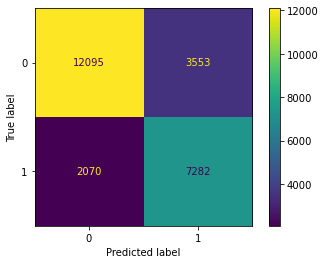

In [452]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model_4, X_test_vectorized, y_test)

## Using Custom Tokens Version 2

Feature engineer custom tokens to see if it enhances our model performance.

In [453]:
tfidf = TfidfVectorizer(
    max_features=1000,
    tokenizer=stem_and_tokenize
)


X_train_vectorized_token2 = tfidf.fit_transform(X_train["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized_token, columns=tfidf.get_feature_names())

,abil,abl,absolut,abus,accept,across,act,action,actual,ad,...,written,wrong,wrote,ye,yeah,year,yet,young,younger,zombi
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.068736,0.0,0.0,0.0,0.000000,0.063521,0.000000,0.000000,...,0.000000,0.067064,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.120293,0.000000,...,0.136517,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.000000,0.0,0.0,0.0,0.047128,0.000000,0.000000,0.052934,...,0.000000,0.000000,0.0,0.0,0.033410,0.000000,0.0,0.000000,0.0,0.0
74996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.101034,0.000000,0.0,0.000000,0.0,0.0
74997,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.039263,0.000000,...,0.089117,0.050568,0.0,0.0,0.000000,0.102047,0.0,0.000000,0.0,0.0
74998,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [454]:
stemmed_cv = cross_val_score(baseline_model3, X_train_vectorized_token2, y_train)
stemmed_cv

array([0.74866667, 0.74846667, 0.7536    , 0.75026667, 0.7488    ])

In [455]:
baseline_model3.fit(X_train_vectorized_token2, y_train)
y_pred_token3 = baseline_model3.predict(X_test_vectorized)

In [456]:
print(classification_report(y_test, y_pred_token3))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76     15648
           1       0.37      0.04      0.07      9352

    accuracy                           0.62     25000
   macro avg       0.50      0.50      0.41     25000
weighted avg       0.53      0.62      0.50     25000



### GridSearch After Creating Custom Tokens

In [457]:
NB_grid_search.fit(X_train_vectorized_token2, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=True ....................
[CV] ..... alpha=0.01, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.01, class_prior=None, fit_prior=False ...................
[CV] .... alpha=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... alpha=0.01, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=True .....................
[CV] ...... alpha=0.1, class_prior=None, fit_prior=True, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=False ....................
[CV] ..... alpha=0.1, class_prior=None, fit_prior=False, total=   0.0s
[CV] alpha=0.1, class_prior=None, fit_prior=False ....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'class_prior': [None], 'fit_prior': [True, False]},
             verbose=2)

In [458]:
NB_grid_search.best_params_

{'alpha': 10.0, 'class_prior': None, 'fit_prior': False}

In [459]:
baseline_model_token2 = MultinomialNB(alpha = 10.0,
                                    fit_prior=False,
                                class_prior=None)
baseline_model_token2.fit(X_train_vectorized_token2, y_train)
y_pred_token4 = baseline_model_token2.predict(X_test_vectorized)

In [460]:
print(classification_report(y_test, y_pred_token4))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63     15648
           1       0.39      0.41      0.40      9352

    accuracy                           0.54     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.54      0.54      0.54     25000



## Random Forest Version 2

Create second model with Random Forest.  Utilizie gridsearch to find best parameters.

In [461]:
rf_baseline_model2 = RandomForestClassifier()

In [462]:
rf_baseline_model2.fit(X_train_vectorized, y_train)
y_pred_rf3 = rf_baseline_model2.predict(X_test_vectorized)

In [463]:
print(classification_report(y_test, y_pred_rf3))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83     15648
           1       0.77      0.53      0.63      9352

    accuracy                           0.76     25000
   macro avg       0.76      0.72      0.73     25000
weighted avg       0.76      0.76      0.75     25000



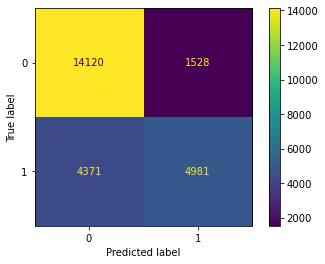

In [464]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_baseline_model2, X_test_vectorized, y_test)

### GridSearch on Random Forest Version 2

In [465]:
rf_grid_search2 = GridSearchCV(estimator=rf_baseline_model2,
                              param_grid=rf_grid, cv=5, n_jobs=1)

In [466]:
rf_grid_search2.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [467]:
rf_grid_search2.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

In [468]:
rf_model_4 = RandomForestClassifier(criterion='entropy',
                                    max_depth=7,
                                    max_features='auto',)
rf_model_4.fit(X_train_vectorized, y_train)
y_pred_rf4 = rf_model_4.predict(X_test_vectorized)

In [469]:
print(classification_report(y_test, y_pred_rf4))

              precision    recall  f1-score   support

           0       0.65      1.00      0.78     15648
           1       0.94      0.08      0.15      9352

    accuracy                           0.65     25000
   macro avg       0.79      0.54      0.47     25000
weighted avg       0.76      0.65      0.55     25000



## XG Boost Version 2

Third Model with XG Boost

In [470]:
xgb_baseline_model2 = XGBClassifier()

In [471]:
xgb_baseline_model2.fit(X_train_vectorized, y_train)
y_pred_XG3 = xgb_baseline_model2.predict(X_test_vectorized)

In [472]:
print(classification_report(y_test, y_pred_XG3))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     15648
           1       0.76      0.60      0.67      9352

    accuracy                           0.78     25000
   macro avg       0.78      0.74      0.75     25000
weighted avg       0.78      0.78      0.77     25000



### GridSearch on XG Boost Version 2

In [473]:
xgb_grid_search2 = GridSearchCV(estimator=xgb_baseline_model2,
                               param_grid=xgb_grid, cv=5, n_jobs=1)

xgb_grid_search2.fit(X_train_vectorized, y_train)

xgb_grid_search.best_params_

xgb_model_4 = XGBClassifier(learning_rate=0.2,
                                    min_child_weight=2,
                                    max_depth=6,
                                    subsample=0.7,
                                    n_estimators=100)
xgb_model_2.fit(X_train_vectorized, y_train)
y_pred_XG4 = xgb_model_4.predict(X_test_vectorized)

# Best Fit Model Version 2

The best model for classifying the ratings into two categories was the Multinomial NB model utilizing gridsearch.  The model will accurately predict the rating 78% of the time.

In [474]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     15648
           1       0.67      0.78      0.72      9352

    accuracy                           0.78     25000
   macro avg       0.76      0.78      0.77     25000
weighted avg       0.79      0.78      0.78     25000



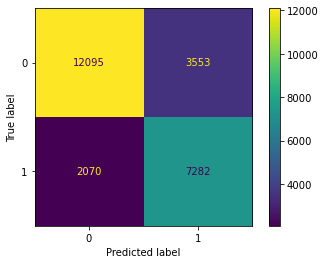

In [475]:
plot_confusion_matrix(baseline_model_4, X_test_vectorized, y_test)

## Conclusion

Two versions of modeling was concluded utilizing the dataset.  Prior to modeling a sample of 100,000 was taken from the data and the ratings were weighted to help with clas imbalance.

Version One: Utlizing all ratings 1-5.  The best fit model was the Multinomial NB which accurately predicted the correct rating 47% of the time.  With a score so low it was decided to create a second version, grouping the ratings together to see if it helped with the overall score.

Version Two: Grouped Rating 4 & 5 with the label of 1.  Grouped Rating 1, 2, & 3 with the label 0.  The best fit model was again Multinomial utilizing Gridsearch to find the best parameters.  This model accurately predicted the grouped rating 78% of the time.

It is the recommendation to continue to use version 2 of model with Multinomial NB while utilizing gridsearch best parameters.  This will help identify which books are higher rated and should be showcased more prominently in the physical storefronts.

Next Steps would be to continue to build upon the model to be able to increase the amount of reviews which can be inputted while shortening the overall run time.

    